## CS4431 HW6: Regression 
###  Peter Strimbu, Megan Hoeksema, Samantha Reno, Patrick Ayers

#### Packages

In [108]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pandas_profiling as pp
import plotly.express as px
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

#### Loading the Dataset

In [2]:
housing = fetch_california_housing()

housing_df = pd.DataFrame(data=housing['data'], columns=housing['feature_names'])

housing_df["target"] = housing.target

housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

#### Exploratory Data Analysis

In [3]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
housing_df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [6]:
corrmap = housing_df.corr()
corrmap.style.background_gradient(cmap="coolwarm")

In [7]:
pp.ProfileReport(housing_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

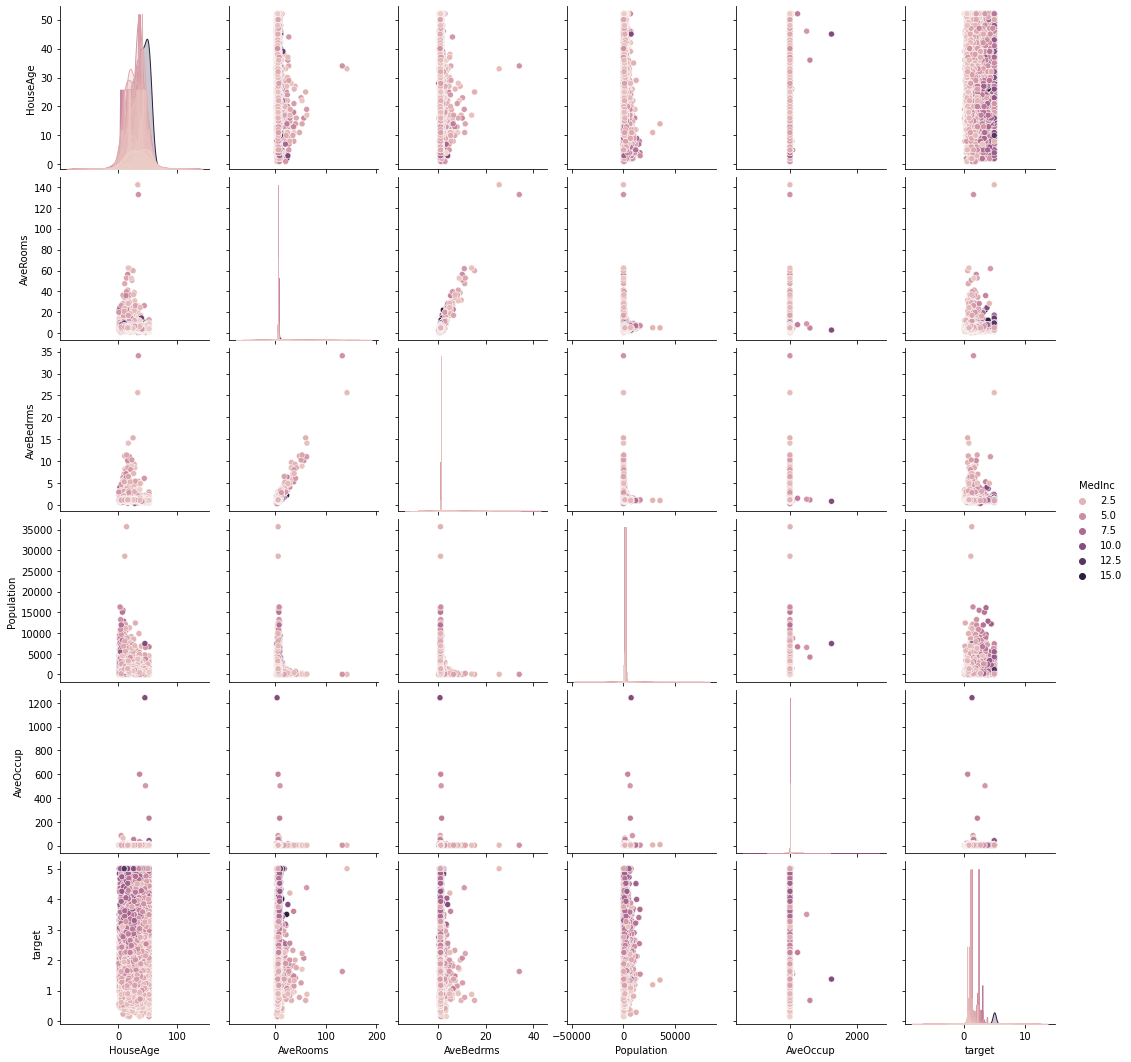

In [8]:
sns.pairplot(housing_df.drop(['Latitude', 'Longitude'], axis=1), hue='MedInc')

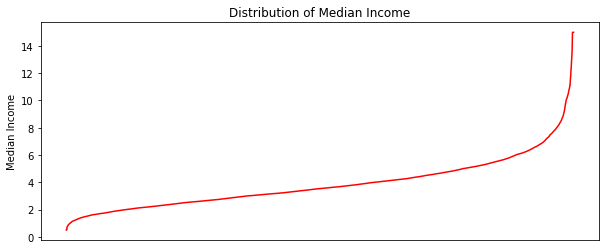

In [9]:
plt.figure(figsize=(10,4))
plt.plot(sorted(housing_df.MedInc), color='red', linewidth=1.5)
plt.ylabel('Median Income')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.title('Distribution of Median Income')
plt.show()

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MedInc'>

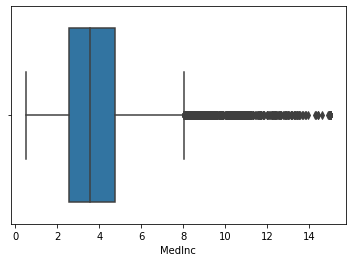

In [10]:
# Detecting Outliers

sns.boxplot(housing_df['MedInc'])

/mnt/c/users/rainb/desktop/scripts/COMP4447/dst1_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

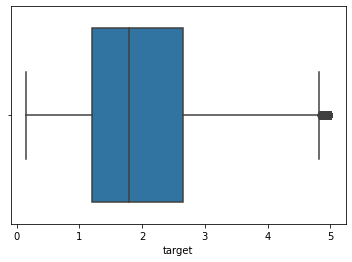

In [11]:
sns.boxplot(housing_df['target'])

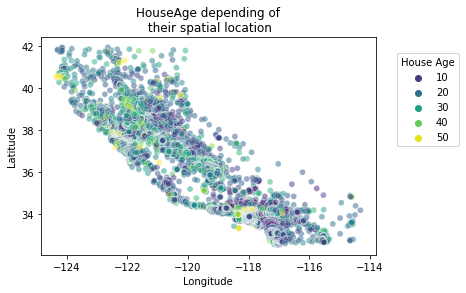

In [14]:
sns.scatterplot(data=housing_df, x="Longitude", y="Latitude", hue="HouseAge",
                palette="viridis", alpha=0.5)
plt.legend(title="House Age", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("HouseAge depending of\n their spatial location")

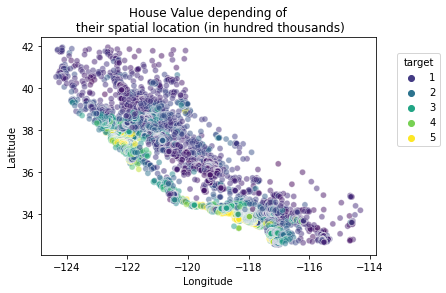

In [15]:
sns.scatterplot(data=housing_df, x="Longitude", y="Latitude", hue="target",
                palette="viridis", alpha=0.5)
plt.legend(title="target", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("House Value depending of\n their spatial location (in hundred thousands)")

### Conclusions from  Exploratory Data Analysis

- Description of the California Housing dataset from Sklearn shows the characteristics of the dataset. This dataset includes 8 numeric attributes and 1 target variable which is the median house value for california districts.

- Information about the dataframe using .info shows that each column has 0 non-null values and that each column is a float64 type.

- The correlation heatmap shows that the two variables that are the most correlated are AveBedrms and AveRooms. The variable most correlated with the target is MedInc.

- Detecting outliers: Based on the boxplot for MedInc, values over 8 are believed to be outliers. We can also see in the target column that values close to 5 are also considered outliers.

- Based on the scatterplots of lattitude and longitude, we can see that the plot very closely represents the state of california. For the house value, we can see the higher priced homes are mostly along the coast.

### Regression Analysis

#### Single variable Linear Regression

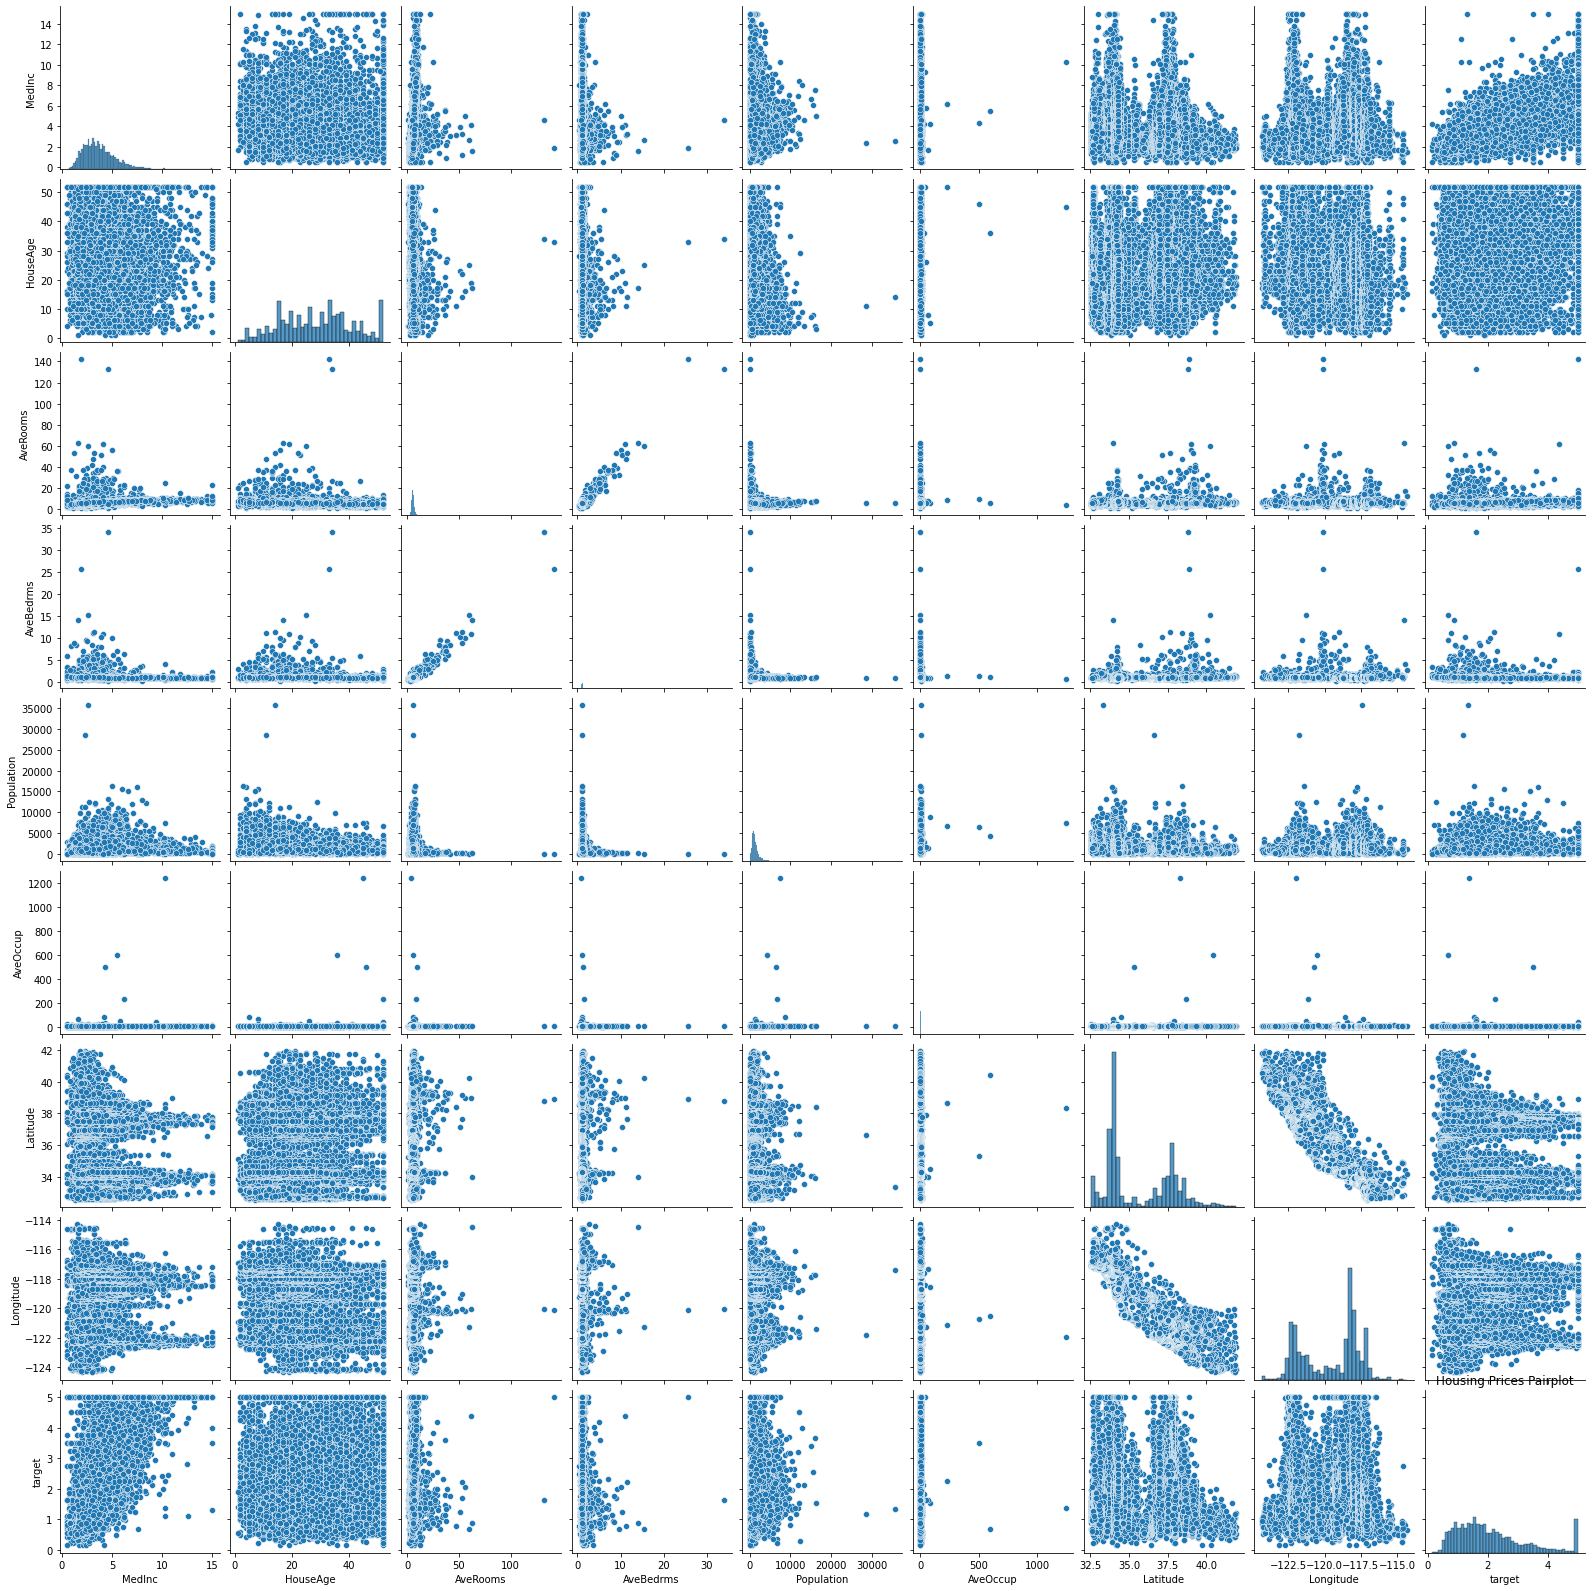

In [19]:
# create a pairplot of the data to figure out which pairs show a linear relationship and are candidates for linear regression

# making the pairplot
sns.pairplot(housing_df, palette="viridis")

# giving a title to our plots
plt.title("Housing Prices Pairplot")

plt.show()

Based on the pairplot above, we can see that AveBedrms and Ave rooms show the best linear relationship which our correlation matrix from the EDA also suggests a strong correlation.

MedInc and target also shows a pretty good linear relationship. In fact, our correlation matrix from the EDA shows that the MedInc is the most correlated with the target.

In [45]:
# Create X, y dataframes for the pair that shows the best linear relationship.
X = housing_df[['MedInc']]
y = housing_df[['target']]
X.shape, y.shape

((20640, 1), (20640, 1))

<AxesSubplot:xlabel='MedInc', ylabel='target'>

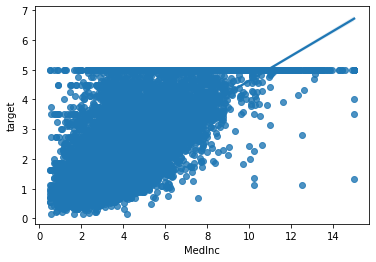

In [77]:
# Visualize the data to verify a linear relationship.
sns.regplot(x = "MedInc", y = "target", data = housing_df )

Based on the above scatter plot, the data is confirmed to show a linear trend, so we can proceed with a linear regression

<AxesSubplot:xlabel='AveBedrms', ylabel='AveRooms'>

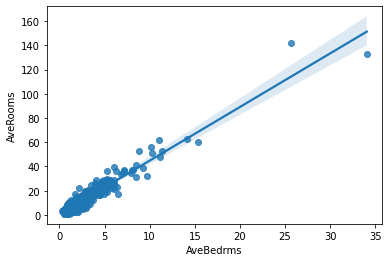

In [78]:
# Visualize the data to verify a linear relationship.
sns.regplot(x = "AveBedrms", y = "AveRooms", data = housing_df )

In [47]:
lr_sing = LinearRegression().fit(X, y)

lr_sing_preds = lr_sing.predict(X)

# print the predicted response
print(f"predicted response:\n{lr_sing_preds}\n")

# using the function score() to see the accuracy of our model based
print("Accuracy Score:", lr_sing.score(X, y)*100)

# Print out the intercept
print('Intercept:', lr_sing.intercept_)

# Print out the coefficients (slope)
print('Coefficients:', lr_sing.coef_)

# Determine the RMSE
model_mse = mean_squared_error(y, lr_sing_preds)
model_rmse = np.sqrt(model_mse)
print('RMSE:', model_rmse)

predicted response:
[[3.9302773 ]
 [3.92033036]
 [3.48400258]
 ...
 [1.1613512 ]
 [1.23123052]
 [1.44914365]]

Accuracy Score: 47.344749180719894
Intercept: [0.45085577]
Coefficients: [[0.41793849]]
RMSE: 0.8373357452616917


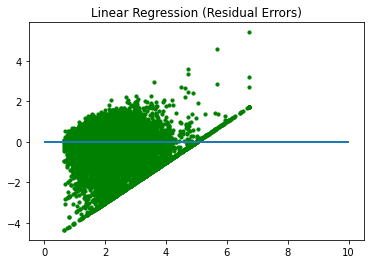

In [50]:
# Linear Regression- Plotting the residuals
plt.scatter(lr_sing.predict(X), lr_sing.predict(X) - y, color = "green", s = 10)
plt.hlines(y = 0, xmin = 0, xmax = 10, linewidth = 2)
plt.title("Linear Regression (Residual Errors)")
plt.show()

#### Multi-Variable Linear Regression

In [37]:
# Create A, b dataframes
housing_df = housing_df.drop(['Latitude', 'Longitude'], axis=1)
A = housing_df.drop('target', axis=1)
b = housing_df.target

In [51]:
# Linear Regression
lr_multi = LinearRegression().fit(A, b)

lr_multi_preds = lr_multi.predict(A)

# print the predicted response
print(f"predicted response:\n{lr_multi_preds}\n")

# using the function score() to see the accuracy of our model based
print("Accuracy Score:", lr_multi.score(A, b)*100)

# Print out the intercept
print('Intercept:', lr_multi.intercept_)

# Print out the coefficients (slope)
print('Coefficients:', lr_multi.coef_)

# Determine the RMSE
model_mse = mean_squared_error(y, lr_multi_preds)
model_rmse = np.sqrt(model_mse)
print('RMSE:', model_rmse)

predicted response:
[4.24065384 4.05230016 3.62473605 ... 0.77597845 0.90261232 1.16766734]

Accuracy Score: 53.96977345638283
Intercept: -0.4390934214281681
Coefficients: [ 5.36910326e-01  1.65033593e-02 -2.11740382e-01  9.93729775e-01
  2.21093787e-05 -4.87715048e-03]
RMSE: 0.7828892767626021


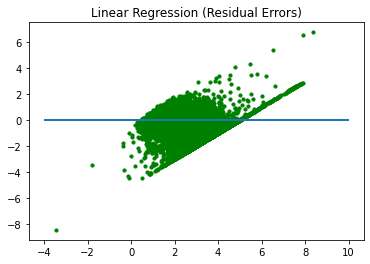

In [52]:
# Linear Regression- Plotting the residuals
plt.scatter(lr_multi.predict(A), lr_multi.predict(A) - b, color = "green", s = 10)
plt.hlines(y = 0, xmin = -4, xmax = 10, linewidth = 2)
plt.title("Linear Regression (Residual Errors)")
plt.show()

### Conclusions from Linear Regression

The accuracy of the single model is 47% however we have improved on this when adding more variables. The full mode accuracy is 54% which is not a big increase but still an increase. If we play around with the number and combination of variables we could improve the accuracy of the model even more. An easier way to determine this could be using stepwise regression.

#### OLS Regression

In [55]:
ols = sm.OLS(b, A)
ols_result = ols.fit()

ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                          2.766e+04
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                        0.00
Time:                        08:55:52   Log-Likelihood:                         -24361.
No. Observations:               20640   AIC:                                  4.873e+04
Df Residuals:                   20634   BIC:                                  4.878e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5028      0.004    141.855      0.000       0.496       0.510
HouseAge       0.0119      0.000     32.640      0.000       0.011       0.013
AveRooms      -0.1904      0.006    -32.306      0.000      -0.202      -0.179
AveBedrms      0.7917      0.027     29.531      0.000       0.739       0.844
Population -1.409e-05   4.59e-06     -3.069      0.002   -2.31e-05   -5.09e-06
AveOccup      -0.0049      0.001     -9.307      0.000      -0.006      -0.004
==============================================================================
Omnibus:                     5223.285   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20029.057
Skew:                           1.222   Prob(JB):                         0.00
Kurtosis:                       7.161   Cond. No.                     9.12e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


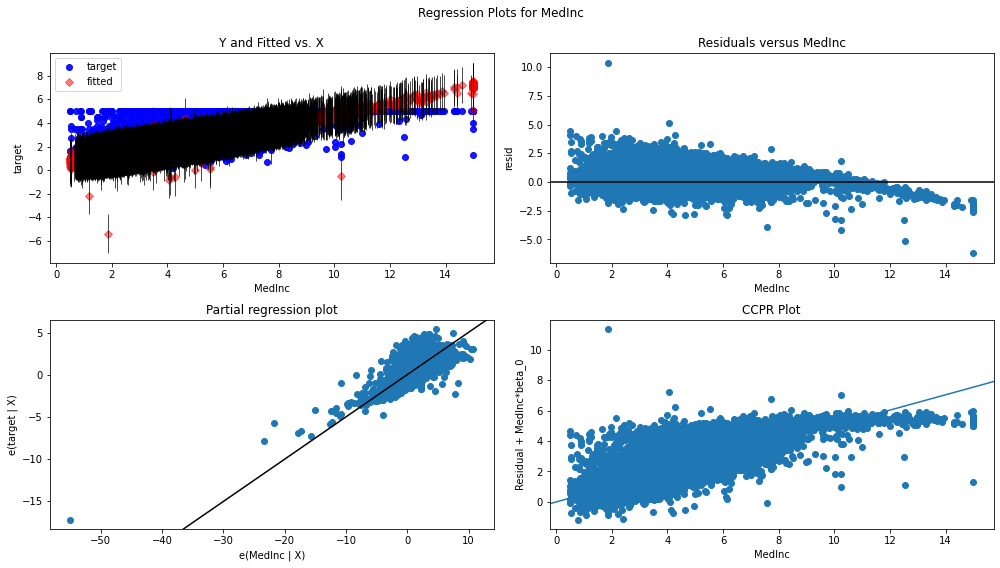

In [102]:
ols_fig = plt.figure(figsize=(14, 8))
ols_fig = sm.graphics.plot_regress_exog(ols_result,'MedInc',fig = ols_fig)

#### Ridge Regression

In [85]:
model_ridge = RidgeCV(alphas = [1]).fit(X, y)
model_ridge.score(X, y)
model_ridge_preds = model_ridge.predict(X)

# using the function score() to see the accuracy of our model based
print("Accuracy Score:", model_ridge.score(X, y)*100)

# Print out the intercept
print('Intercept:', model_ridge.intercept_)

# Print out the coefficients (slope)
print('Coefficients:', model_ridge.coef_)

# Determine the RMSE
model_mse = mean_squared_error(y, model_ridge_preds)
model_rmse = np.sqrt(model_mse)
print('RMSE:', model_rmse)

Accuracy Score: 47.3447491721882
Intercept: [0.45087748]
Coefficients: [[0.41793288]]
RMSE: 0.8373357453295281


In [88]:
model_ridge_full = RidgeCV(alphas = [1]).fit(A, b)
model_ridge_full.score(A, b)
model_ridge_full_preds = model_ridge_full.predict(A)

# using the function score() to see the accuracy of our model based
print("Accuracy Score:", model_ridge_full.score(A, b)*100)

# Print out the intercept
print('Intercept:', model_ridge_full.intercept_)

# Print out the coefficients (slope)
print('Coefficients:', model_ridge_full.coef_)

# Determine the RMSE
model_mse = mean_squared_error(y, model_ridge_full_preds)
model_rmse = np.sqrt(model_mse)
print('RMSE:', model_rmse)

Accuracy Score: 53.96976738001589
Intercept: -0.438461747980579
Coefficients: [ 5.36756489e-01  1.65051503e-02 -2.11448684e-01  9.92192016e-01
  2.21193950e-05 -4.87682428e-03]
RMSE: 0.782889328436499


#### Lasso Regression

In [89]:
model_lasso_sing = Lasso().fit(X, y)
model_lasso_sing_preds = model_lasso_sing.predict(X)

# using the function score() to see the accuracy of our model based
print("Accuracy Score:", model_lasso_sing.score(X, y)*100)

# Print out the intercept
print('Intercept:', model_lasso_sing.intercept_)

# Print out the coefficients (slope)
print('Coefficients:', model_lasso_sing.coef_)

# Determine the RMSE
model_mse = mean_squared_error(y, model_lasso_sing_preds)
model_rmse = np.sqrt(model_mse)
print('RMSE:', model_rmse)

Accuracy Score: 26.53639319761717
Intercept: [1.52331701]
Coefficients: [0.14086477]
RMSE: 0.9890424039585198


In [96]:
model_lasso_full = Lasso().fit(A, b)
model_lasso_full_preds = model_lasso_full.predict(A)

# using the function score() to see the accuracy of our model based
print("Accuracy Score:", model_lasso_full.score(A, b)*100)

# Print out the intercept
print('Intercept:', model_lasso_full.intercept_)

# Print out the coefficients (slope)
print('Coefficients:', model_lasso_full.coef_)

# Determine the RMSE
model_mse = mean_squared_error(y, model_lasso_full_preds)
model_rmse = np.sqrt(model_mse)
print('RMSE:', model_rmse)

Accuracy Score: 28.526231449198313
Intercept: 1.3480413673416143
Coefficients: [ 1.45469232e-01  5.81496884e-03  0.00000000e+00 -0.00000000e+00
 -6.37292607e-06 -0.00000000e+00]
RMSE: 0.9755558311126926


#### Elastic Net

In [91]:
eNet = ElasticNet(alpha = 1).fit(X, y)
eNet_preds = eNet.predict(X)

# using the function score() to see the accuracy of our model based
print("Accuracy Score:", eNet.score(X, y)*100)

# Print out the intercept
print('Intercept:', eNet.intercept_)

# Print out the coefficients (slope)
print('Coefficients:', eNet.coef_)

# Determine the RMSE
model_mse = mean_squared_error(y, eNet_preds)
model_rmse = np.sqrt(model_mse)
print('RMSE:', model_rmse)

Accuracy Score: 39.276145781720615
Intercept: [1.11867959]
Coefficients: [0.24540411]
RMSE: 0.8992044612126536


In [94]:
eNet_full = ElasticNet(alpha = 1).fit(A, b)
eNet_full_preds = eNet_full.predict(A)

# using the function score() to see the accuracy of our model based
print("Accuracy Score:", eNet_full.score(A, b)*100)

# Print out the intercept
print('Intercept:', eNet_full.intercept_)

# Print out the coefficients (slope)
print('Coefficients:', eNet_full.coef_)

# Determine the RMSE
model_mse = mean_squared_error(y, eNet_full_preds)
model_rmse = np.sqrt(model_mse)
print('RMSE:', model_rmse)

Accuracy Score: 42.30627291195209
Intercept: 0.7511805359564867
Coefficients: [ 2.53202643e-01  1.12982857e-02  0.00000000e+00 -0.00000000e+00
  9.63636030e-06 -0.00000000e+00]
RMSE: 0.8764821710504334


### Final Conclusions

While the most correlated variables are AveBdrms and AveRooms, we primarily focused on the relationship between MedInc and the Target as this is what we believe MedInc is the variable that would be the best predictive of the Target.

We investigated linear regression and OLS regression which is another form of linear regression. Based on the results between single variable and multi-variable linear regression, we found our accuracy to improve from 47% to 54% when implementing the model from single to multi-variable. We could potentially improve upon these accuracy scores by continuing to play with the number and combination of variables. We could also perform stepwise regression to help us figure out the best possible model and combination of variables. 

We also investigated OLS regression to compare to linear regression. The model produces a significantly larger R-squared value however, we also see that the condition number is large, 9.12e+03 which might indicate that there are strong multicollinearity or other numerical problems. So the model can be potentially improved upon or may not be a good choice for this dataset.

Lasso and Ridge regression were also investigated. Ridge regression showed the same results as linear regression however lasso regression showed horrible accuracy for both the single variable and multi-varible regression indicating that lasso regression is not a good choice for this dataset.

Elastic net, which is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods, was also evaluated. The accuracy scores of these models were better than lasso but performed more poorly than that of linear and ridge regressions.